# Super-resolución 4x; Procesado de imágenes:


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import torchvision.utils as vutils
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import save_image
from pathlib import Path
from os.path import join

In [2]:
class SuperResolution(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv = nn.Conv2d(3, 12, kernel_size = 5, padding = 2)
        self.upsample = nn.PixelShuffle(upscale_factor = 2)

    def forward(self, xb):
        
        xb = torch.tanh(self.conv(xb))
        xb = self.upsample(xb)
        xb = torch.sigmoid(self.conv2(xb))
        
        return self.upsample(xb)

In [3]:
model = torch.load("SR_model_3.0.ml")
model.eval()

SuperResolution(
  (conv): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (upsample): PixelShuffle(upscale_factor=2)
)

In [4]:
bs = 16
workers = 4
ngpu = 1
output_path = "output/pred_imgs"

Path(output_path).mkdir(parents=True, exist_ok=True)

path_valid_x = "images/valid/valid_x"

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

imgs_valid_x = datasets.ImageFolder(path_valid_x, transform = transform)

In [6]:
imgs_valid_x_dl = DataLoader(imgs_valid_x, batch_size = bs, num_workers = workers)

In [7]:
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [8]:
def save_images(i, pred_sr):
    for j, img in enumerate(pred_sr):
        filename = str(bs*i + j+1).zfill(5) + ".png"
        save_image(img, join(output_path, filename))

In [9]:
model = model.to(device)

In [10]:
i = 0
for xb, _ in imgs_valid_x_dl:
    xb = xb.to(device)
    imgs_sr = model(xb)
    save_images(i, imgs_sr)
    i += 1    

In [11]:
pred_imgs_fd = datasets.ImageFolder("output", transform = transform)
pred_imgs_dl = DataLoader(pred_imgs_fd, batch_size = bs, num_workers = workers)
iter_pred_imgs = iter(pred_imgs_dl)
imgs, _ = iter_pred_imgs.next()

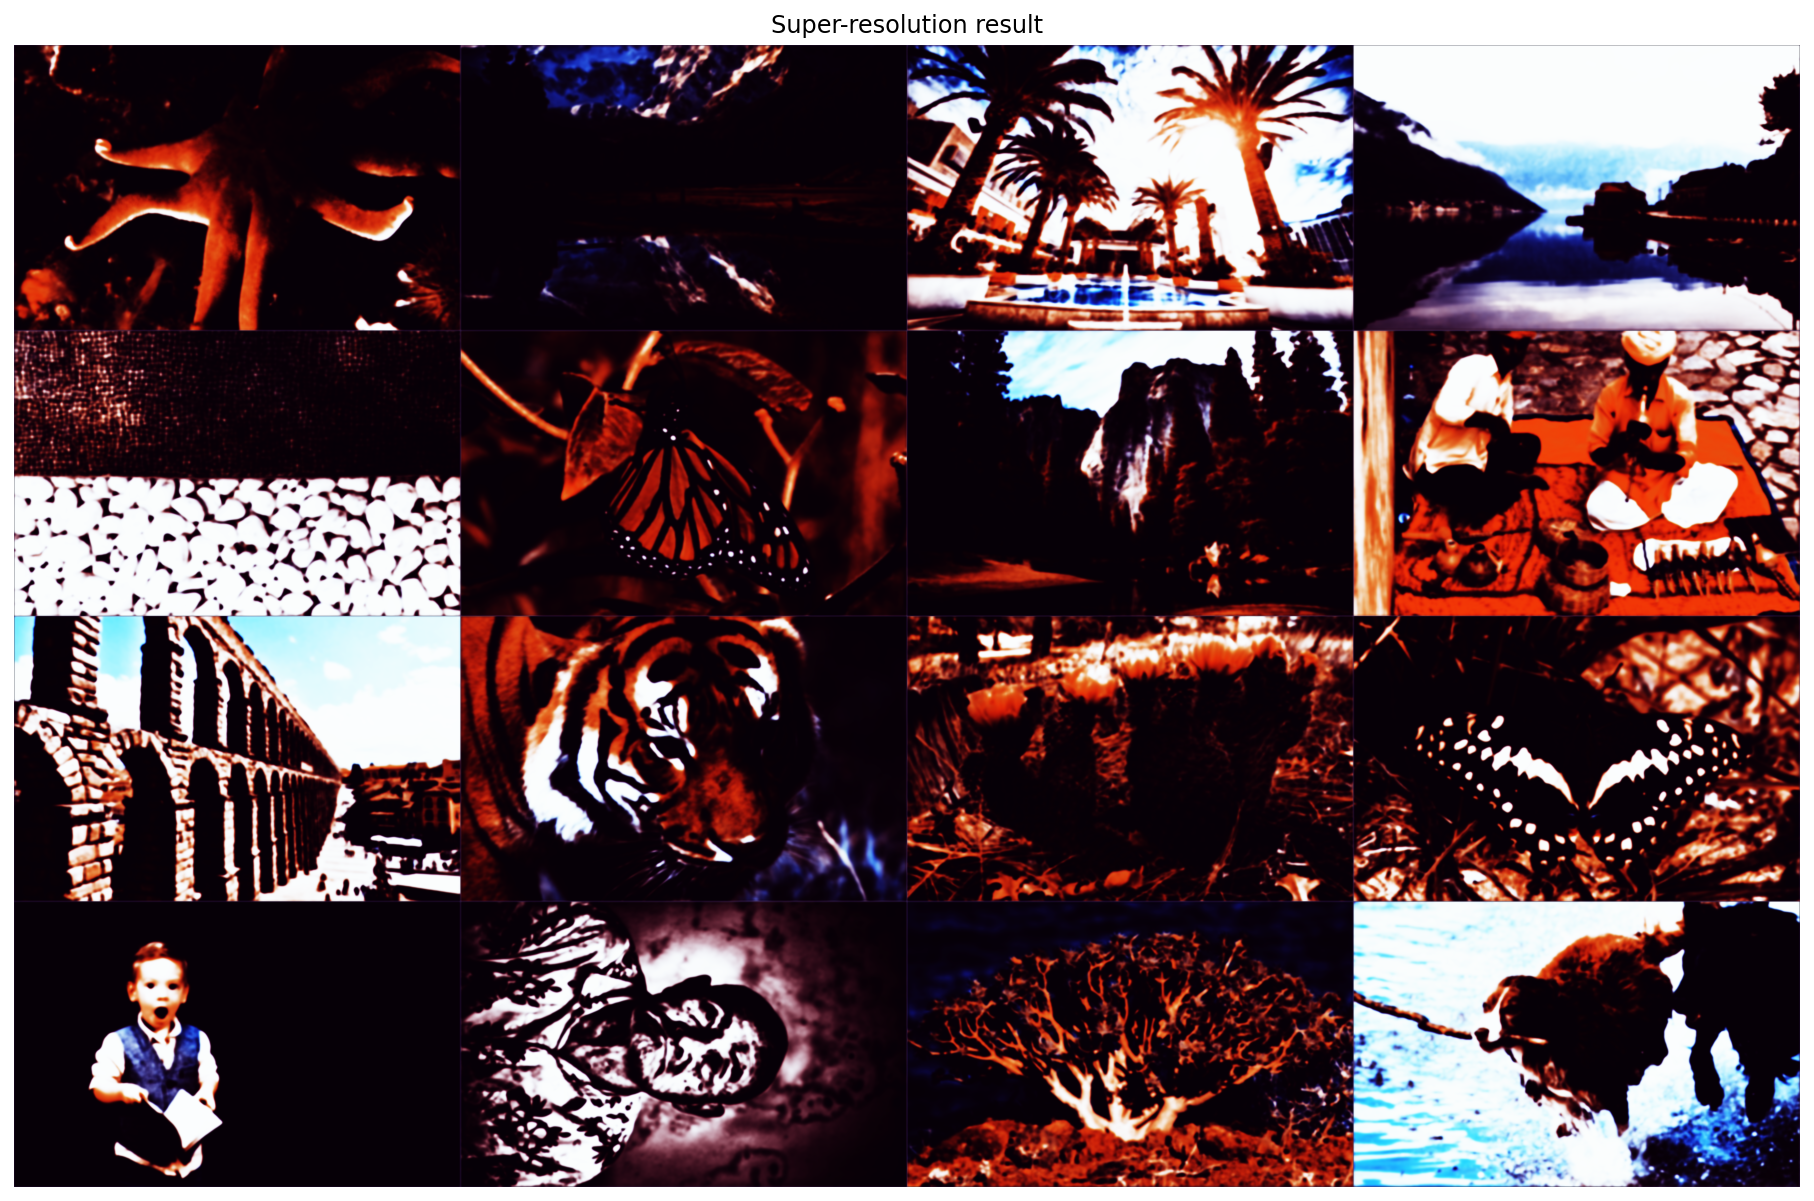

In [12]:
grid_img = vutils.make_grid(imgs, nrow=4, padding=1, normalize=True)
plt.figure(figsize=(16, 16))
plt.axis("off")
plt.title("Super-resolution result")
plt.imshow(grid_img.permute(1, 2, 0))

In [13]:
%%javascript
Jupyter.notebook.session.delete();

<IPython.core.display.Javascript object>